![](https://img.kaikeba.com/70350130700202jusm.png)

# AI核心课作业2-4-使用逻辑回归诊断疾病

## 导入项目相关库
&emsp;&emsp;我们需要使用pandas进行数据处理，使用sklearn进行数据划分、标准化、模型预测等操作，使用matplotlib绘制相关图表。<br>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 导入数据
&emsp;&emsp;数据文件已保存在'dataSet/heart.csv'，我们可以使用read_csv函数将数据集读到内存中。<br>

In [34]:
dataPath = '/data/course_data/AI/AI_homework_4_heart.csv'
data = pd.read_csv(dataPath)

## 了解数据集
&emsp;&emsp;首先让我们来看看数据内容，以便对数据集有个初步了解。

In [35]:
# 使用.head()函数可以查看数据集的头部数据
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# 使用.info()函数可以查看数据集的主要信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
# 使用.describe()函数可以查看数据的统计信息
# 统计信息包括总数、均值、方差、最小值、第一四分位数、第二四分位数、第三四分位数、最大值。
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x7f54ad1e8150>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

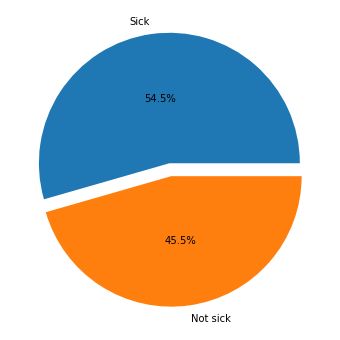

In [38]:
# 下面我们来看一看303人里有多少人被确诊为病患。
pie, ax = plt.subplots(figsize=[10,6])
#labels[1]对应0
plt.pie(x=data['target'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=['Sick', 'Not sick'], pctdistance=0.5)

In [39]:
print(type(data))
#t0 = data['target'].counts(0)

<class 'pandas.core.frame.DataFrame'>


In [40]:
import numpy as np
c = np.where(data['target']==0)
print(type(c))
print(len(c[0]))
print(138.0/303)

<class 'tuple'>
138
0.45544554455445546


*Tips：一般来说，在数据处理或模型预测之前，我们可以检查一下各项特征的相关系数，如果有两个特征之间的相关系数极高，则代表这两个特征内容高度重复，或许可以在特征筛选的时候删除其一；如果某个特征与被预测项之间的相关系数极高，则代表这个特征很重要，需要保留。*

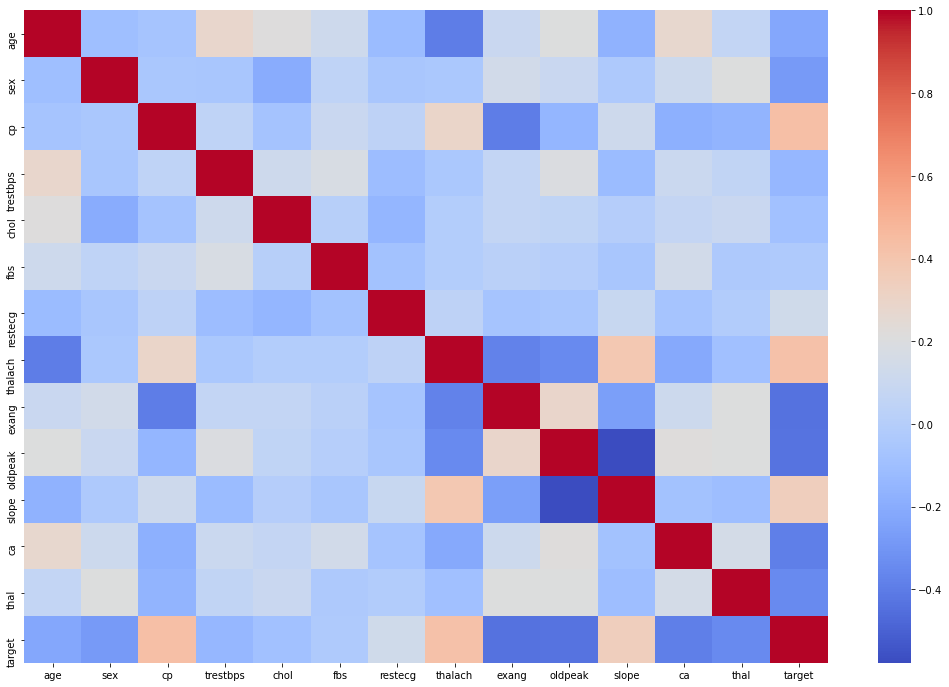

In [41]:
# 查看特征相关系数图
# 颜色越暖代表相关系数越高；颜色越冷代表相关系数越低。
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(data.corr(),ax= ax, cmap='coolwarm');

In [42]:
# 查看特征之间的相关系数具体数值
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 数据处理
### 问题1：Onehot编码（10分）
&emsp;&emsp;<font color=red>请对data数据中需要进行Onehot的特征列，进行Onehot编码处理。</font><br>

In [43]:
######## your code ########
data = pd.get_dummies(data, columns=['cp','restecg','slope','thal'])
######## your code ########

&emsp;&emsp;打印数据info，查看数据列变化。<br>

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   ca         303 non-null    int64  
 9   target     303 non-null    int64  
 10  cp_0       303 non-null    uint8  
 11  cp_1       303 non-null    uint8  
 12  cp_2       303 non-null    uint8  
 13  cp_3       303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  slope_0    303 non-null    uint8  
 18  slope_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  thal_0    

### 问题2：数据、标签划分（10分）
&emsp;&emsp;<font color=red>请对data数据进行标签划分，划分出x_data（Data）与y_data(Laber)。</font><br>

In [45]:
######## your code ########
x_data = data.drop(columns='target')
y_data = data.target.values
print(x_data)
print(y_data)
print(data)
######## your code ########

     age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  cp_0  ...  \
0     63    1       145   233    1      150      0      2.3   0     0  ...   
1     37    1       130   250    0      187      0      3.5   0     0  ...   
2     41    0       130   204    0      172      0      1.4   0     0  ...   
3     56    1       120   236    0      178      0      0.8   0     0  ...   
4     57    0       120   354    0      163      1      0.6   0     1  ...   
..   ...  ...       ...   ...  ...      ...    ...      ...  ..   ...  ...   
298   57    0       140   241    0      123      1      0.2   0     1  ...   
299   45    1       110   264    0      132      0      1.2   0     0  ...   
300   68    1       144   193    1      141      0      3.4   2     1  ...   
301   57    1       130   131    0      115      1      1.2   1     1  ...   
302   57    0       130   236    0      174      0      0.0   1     0  ...   

     restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2

### 问题3：归一化处理（20分）
&emsp;&emsp;<font color=red>请对所有数据列进行归一化处理。</font><br>

In [46]:
######## your code ########
scaler = StandardScaler()
scaler.fit(x_data)
print(scaler.mean_)
x_data = scaler.transform(x_data)
print(x_data)

######## your code ########

[5.43663366e+01 6.83168317e-01 1.31623762e+02 2.46264026e+02
 1.48514851e-01 1.49646865e+02 3.26732673e-01 1.03960396e+00
 7.29372937e-01 4.71947195e-01 1.65016502e-01 2.87128713e-01
 7.59075908e-02 4.85148515e-01 5.01650165e-01 1.32013201e-02
 6.93069307e-02 4.62046205e-01 4.68646865e-01 6.60066007e-03
 5.94059406e-02 5.47854785e-01 3.86138614e-01]
[[ 0.9521966   0.68100522  0.76395577 ...  3.97911213 -1.10076284
  -0.79311554]
 [-1.91531289  0.68100522 -0.09273778 ... -0.25131234  0.9084609
  -0.79311554]
 [-1.47415758 -1.46841752 -0.09273778 ... -0.25131234  0.9084609
  -0.79311554]
 ...
 [ 1.50364073  0.68100522  0.70684287 ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364  0.68100522 -0.09273778 ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364 -1.46841752 -0.09273778 ... -0.25131234  0.9084609
  -0.79311554]]


### 问题4：训练、测试集划分（10分）
&emsp;&emsp;<font color=red>请补全下列代码，将x_data、y_data划分成X_train,X_test,y_train,y_test，其中test占30%。</font><br>

In [47]:
######## your code ########
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=.3 , random_state=33)
######## your code ########

### 问题5：模型定义、训练及评估（30分）
&emsp;&emsp;请完成LogisticRegression模型的定义、训练及评估。<br>
&emsp;&emsp;<font color=red>请定义一个LogisticRegression模型</font>

In [48]:
######## your code ########
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


######## your code ########

&emsp;&emsp;<font color=red>请使用训练数据对LogisticRegression模型进行训练</font>

In [49]:
######## your code ########
clf.fit(X_train, y_train)
######## your code ########

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

使用训练数据对模型进行评估

In [50]:
clf.score(X_train,y_train)

0.8679245283018868

&emsp;&emsp;<font color=red>请参照用训练数据评估的方式，使用测试数据对模型进行评估</font>

In [51]:
######## your code ########
clf.score(X_test, y_test)
######## your code ########

0.8571428571428571

### 问题6：检查主要评价指标（20分）

In [52]:
y_predict = clf.predict(X_test)

&emsp;&emsp;<font color=red>请使用主要评价指标对模型进行评价。</font><br>

In [53]:
######## your code ########
from sklearn.metrics import classification_report
evaluation = classification_report(y_test, y_predict)
print(evaluation)
######## your code ########

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.80      0.90      0.85        41

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

